In [127]:
DEBUG = True

In [128]:
import csv
import pandas as pd

genome_tags = pd.read_csv('src/data/genome-tags.csv')
if DEBUG:
    print(genome_tags)

      tagId           tag
0         1           007
1         2  007 (series)
2         3  18th century
3         4         1920s
4         5         1930s
...     ...           ...
1123   1124       writing
1124   1125         wuxia
1125   1126          wwii
1126   1127        zombie
1127   1128       zombies

[1128 rows x 2 columns]


In [129]:
Genres = ['Action', 'Adventure', 'Animation', 'Children',
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
          'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']

In [130]:
movies = pd.read_csv('src/data/movies.csv')
if DEBUG:
    print(movies)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                              

In [131]:
genome_scores = pd.read_csv('src/data/genome-scores.csv')
if DEBUG:
    print(genome_scores)

          movieId  tagId  relevance
0               1      1    0.02875
1               1      2    0.02375
2               1      3    0.06250
3               1      4    0.07575
4               1      5    0.14075
...           ...    ...        ...
15584443   206499   1124    0.11000
15584444   206499   1125    0.04850
15584445   206499   1126    0.01325
15584446   206499   1127    0.14025
15584447   206499   1128    0.03350

[15584448 rows x 3 columns]


In [132]:
ratings = pd.read_csv('src/data/ratings.csv')
if DEBUG:
    print(ratings)

          userId  movieId  rating   timestamp
0              1      296     5.0  1147880044
1              1      306     3.5  1147868817
2              1      307     5.0  1147868828
3              1      665     5.0  1147878820
4              1      899     3.5  1147868510
...          ...      ...     ...         ...
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515

[25000095 rows x 4 columns]


In [133]:
ratings = ratings.sort_values(by=['timestamp'])
if DEBUG:
    print(ratings)

          userId  movieId  rating   timestamp
326761      2262       21     3.0   789652009
326810      2262     1079     3.0   789652009
326767      2262       47     5.0   789652009
15845015  102689        1     4.0   822873600
15845023  102689       39     5.0   822873600
...          ...      ...     ...         ...
13207880   85523   168252     4.0  1574327479
1284508     8642   202101     2.0  1574327512
13207893   85523   204704     4.0  1574327533
1284464     8642   122914     4.0  1574327549
13207877   85523   149406     4.5  1574327703

[25000095 rows x 4 columns]


In [8]:
tags = pd.read_csv('src/data/tags.csv')
if DEBUG:
    print(tags)

         userId  movieId                  tag   timestamp
0             3      260              classic  1439472355
1             3      260               sci-fi  1439472256
2             4     1732          dark comedy  1573943598
3             4     1732       great dialogue  1573943604
4             4     7569     so bad it's good  1573943455
...         ...      ...                  ...         ...
1093355  162521    66934  Neil Patrick Harris  1427311611
1093356  162521   103341     cornetto trilogy  1427311259
1093357  162534   189169               comedy  1527518175
1093358  162534   189169             disabled  1527518181
1093359  162534   189169              robbery  1527518193

[1093360 rows x 4 columns]


In [134]:
moviesIds = list(set(ratings.set_index('movieId').index.values))
moviesIds.sort()

In [135]:
movie_genres = movies.drop(columns=['movieId', 'title'])
movie_genres_dict = {'movieIds': [], 'genres': []}
for i in moviesIds:
    genres = movie_genres.loc[movies['movieId'] == i]
    movie_genres_dict['movieIds'].append(i)
    movie_genres_dict['genres'].append(genres['genres'].values[0].split('|'))
    if DEBUG:
        if i % 10000 == 0:
            print(i)
            
movies_genres_pd = pd.DataFrame(movie_genres_dict, columns=['movieIds', 'genres'])

if DEBUG:
    print(movies_genres_pd)

130000
140000
150000
160000
170000
200000
       movieIds                                             genres
0             1  [Adventure, Animation, Children, Comedy, Fantasy]
1             2                     [Adventure, Children, Fantasy]
2             3                                  [Comedy, Romance]
3             4                           [Comedy, Drama, Romance]
4             5                                           [Comedy]
...         ...                                                ...
59042    209157                                            [Drama]
59043    209159                                      [Documentary]
59044    209163                                    [Comedy, Drama]
59045    209169                               [(no genres listed)]
59046    209171                         [Action, Adventure, Drama]

[59047 rows x 2 columns]


In [10]:
ratings_temp = ratings.drop(columns=['timestamp', 'userId']).set_index('movieId')
ratings_temp = ratings_temp.join(movies.set_index('movieId')).drop(columns=['title'])

ratings_for_genres = {'Genre name' : [], 'Mean rating' : []}

for i in Genres:
    x = ratings_temp.loc[ratings_temp['genres'].str.contains(i)].drop(columns=['genres'])
    if DEBUG:
        print(i)
        print(x.mean().values[0])
    ratings_for_genres['Genre name'].append(i)
    ratings_for_genres['Mean rating'].append(x.mean().values[0])

Action
3.4665917497681593
Adventure
3.517444633654892
Animation
3.614946348438093
Comedy
3.4239925478057365
Crime
3.685043693003225
Documentary
3.7052805249822454
Drama
3.677184674800756
Fantasy
3.5115889157486
Film-Noir
3.9257281769386028
Horror
3.2935633075659174
Musical
3.554715987107105
Mystery
3.670169244577933
Romance
3.5427121571630567
Sci-Fi
3.4781433928067798
Thriller
3.5229643285084498
War
3.7914657875591984
Western
3.5857553061515595


/home/nhemisirmkow/Studia/Erasmus/Zajęcia/SocialVenv/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(no genres listed)
3.326379239118188


In [11]:
ratings_for_genres = pd.DataFrame.from_dict(ratings_for_genres).set_index("Genre name")
ratings_for_genres.to_csv("output/genres_mean_ratings.csv")

if DEBUG:
    print(ratings_for_genres)

                    Mean rating
Genre name                     
Action                 3.466592
Adventure              3.517445
Animation              3.614946
Comedy                 3.423993
Crime                  3.685044
Documentary            3.705281
Drama                  3.677185
Fantasy                3.511589
Film-Noir              3.925728
Horror                 3.293563
Musical                3.554716
Mystery                3.670169
Romance                3.542712
Sci-Fi                 3.478143
Thriller               3.522964
War                    3.791466
Western                3.585755
(no genres listed)     3.326379


In [12]:
# only ratings no older than 01.01.2015 00:00.
new_ratings = ratings.loc[ratings['timestamp'] >= 1420070400]
ratings = new_ratings
print(ratings)

          userId  movieId  rating   timestamp
13321588   86188     1196     3.5  1420070535
13321586   86188     1036     4.0  1420070551
13321645   86188    58559     3.0  1420070568
13321578   86188      110     2.5  1420070579
13321580   86188      293     3.5  1420070583
...          ...      ...     ...         ...
13207880   85523   168252     4.0  1574327479
1284508     8642   202101     2.0  1574327512
13207893   85523   204704     4.0  1574327533
1284464     8642   122914     4.0  1574327549
13207877   85523   149406     4.5  1574327703

[7563741 rows x 4 columns]


In [13]:
ratings_temp = ratings.drop(columns=['userId']).sort_values(by=['movieId', 'timestamp'])
if DEBUG:
    print(ratings_temp)
    
ratings_temp = ratings_temp.set_index('movieId')

for i in range(11):
    temp = ratings_temp.loc[i * 20000 : (i + 1) * 20000, :]
    print(temp)
    temp.to_csv("output/ratings_sorted" + str(i * 20000) + "-" + str((i + 1) * 20000) + "__.csv")
    


          movieId  rating   timestamp
5119148         1     5.0  1420087507
447035          1     3.5  1420097365
13841732        1     4.5  1420102669
9428426         1     2.0  1420112716
5739334         1     3.0  1420148490
...           ...     ...         ...
18457961   209157     1.5  1574280748
17864443   209159     3.0  1574280985
1036618    209163     4.5  1574284913
18457962   209169     3.0  1574291826
18457963   209171     3.0  1574291937

[7563741 rows x 3 columns]
         rating   timestamp
movieId                    
1           5.0  1420087507
1           3.5  1420097365
1           4.5  1420102669
1           2.0  1420112716
1           3.0  1420148490
...         ...         ...
9018        3.5  1546835784
9018        2.0  1553134754
9018        3.5  1563511212
9018        2.0  1570228245
9019        5.0  1501258202

[3574782 rows x 2 columns]
         rating   timestamp
movieId                    
25735       3.0  1439912698
25735       3.0  1447225294
25735       

In [192]:
temp = pd.read_csv("output/ChiTestMovieLens.csv").set_index('movieId')

In [193]:
print(temp)

         pvalue (ordered sample)  pvalue (random sample1)  \
movieId                                                     
1                   2.603160e-19                 0.336652   
2                   6.410504e-06                 0.861988   
3                   7.720390e-01                 0.983502   
4                   1.123152e-01                 0.969107   
5                   7.699567e-01                 0.922347   
...                          ...                      ...   
205383              3.623943e-01                 0.320411   
205425              5.051991e-01                 0.441986   
206499              6.571611e-01                 0.739227   
206805              1.606419e-02                 0.246397   
207830              8.326452e-02                 0.729034   

         pvalue (random sample2)  pvalue (random sample3)  
movieId                                                    
1                       0.586705                 0.849577  
2                       0.

In [194]:
temp = temp.join(movies_genres_pd.set_index('movieIds'))

In [195]:
print(temp)

         pvalue (ordered sample)  pvalue (random sample1)  \
movieId                                                     
1                   2.603160e-19                 0.336652   
2                   6.410504e-06                 0.861988   
3                   7.720390e-01                 0.983502   
4                   1.123152e-01                 0.969107   
5                   7.699567e-01                 0.922347   
...                          ...                      ...   
205383              3.623943e-01                 0.320411   
205425              5.051991e-01                 0.441986   
206499              6.571611e-01                 0.739227   
206805              1.606419e-02                 0.246397   
207830              8.326452e-02                 0.729034   

         pvalue (random sample2)  pvalue (random sample3)  \
movieId                                                     
1                       0.586705                 0.849577   
2                      

In [196]:
all_gen = { i : 0 for i in GenresWithoutIMAX }
print(all_gen)
good_gen = { i : 0 for i in GenresWithoutIMAX }
print(good_gen)

{'Action': 0, 'Adventure': 0, 'Animation': 0, 'Children': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 0, 'Fantasy': 0, 'Film-Noir': 0, 'Horror': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 0, 'Sci-Fi': 0, 'Thriller': 0, 'War': 0, 'Western': 0, '(no genres listed)': 0}
{'Action': 0, 'Adventure': 0, 'Animation': 0, 'Children': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 0, 'Fantasy': 0, 'Film-Noir': 0, 'Horror': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 0, 'Sci-Fi': 0, 'Thriller': 0, 'War': 0, 'Western': 0, '(no genres listed)': 0}


In [197]:
for index, row in temp.iterrows():
#     print(row)
    for i in row['genres']:
        if i == 'IMAX':
            continue
        if (row['pvalue (ordered sample)'] < 0.05):
            good_gen[i] = good_gen[i] + 1
        all_gen[i] = all_gen[i] + 1

In [198]:
print(all_gen)
print(good_gen)

{'Action': 1665, 'Adventure': 1135, 'Animation': 606, 'Children': 615, 'Comedy': 3029, 'Crime': 1129, 'Documentary': 360, 'Drama': 3891, 'Fantasy': 722, 'Film-Noir': 78, 'Horror': 1023, 'Musical': 265, 'Mystery': 597, 'Romance': 1336, 'Sci-Fi': 900, 'Thriller': 1993, 'War': 332, 'Western': 138, '(no genres listed)': 38}
{'Action': 251, 'Adventure': 185, 'Animation': 75, 'Children': 78, 'Comedy': 365, 'Crime': 154, 'Documentary': 34, 'Drama': 424, 'Fantasy': 100, 'Film-Noir': 12, 'Horror': 114, 'Musical': 23, 'Mystery': 82, 'Romance': 172, 'Sci-Fi': 158, 'Thriller': 255, 'War': 39, 'Western': 19, '(no genres listed)': 5}


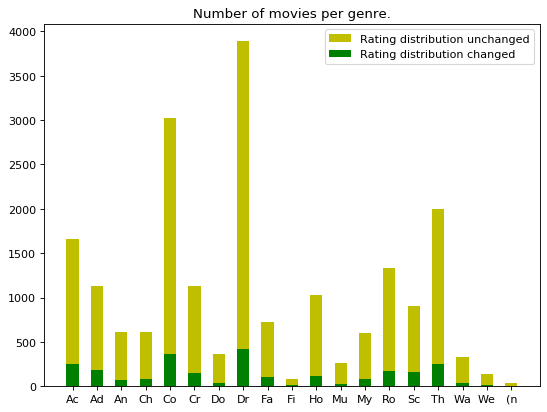

In [199]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
GenresWithoutIMAX = list(filter(lambda x : x != "IMAX", Genres))
plt.title("Number of movies per genre.")
plt.bar(list(map(lambda x: x[0:2],all_gen.keys())), 
        all_gen.values(), 
        width=0.5, 
        color='y').set_label("Rating distribution unchanged")
plt.bar(list(map(lambda x: x[0:2],good_gen.keys())), 
        good_gen.values(),
        width=0.5, 
        color='g').set_label("Rating distribution changed")
plt.legend()
plt.savefig("output/plots/Marcin_test_half_per_genre.pdf")

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']
{'Action': 0.15075075075075076, 'Adventure': 0.16299559471365638, 'Animation': 0.12376237623762376, 'Children': 0.12682926829268293, 'Comedy': 0.12050181578078574, 'Crime': 0.13640389725420726, 'Documentary': 0.09444444444444444, 'Drama': 0.10896941660241583, 'Fantasy': 0.13850415512465375, 'Film-Noir': 0.15384615384615385, 'Horror': 0.11143695014662756, 'Musical': 0.08679245283018867, 'Mystery': 0.1373534338358459, 'Romance': 0.12874251497005987, 'Sci-Fi': 0.17555555555555555, 'Thriller': 0.12794781736076266, 'War': 0.11746987951807229, 'Western': 0.13768115942028986, '(no genres listed)': 0.13157894736842105}


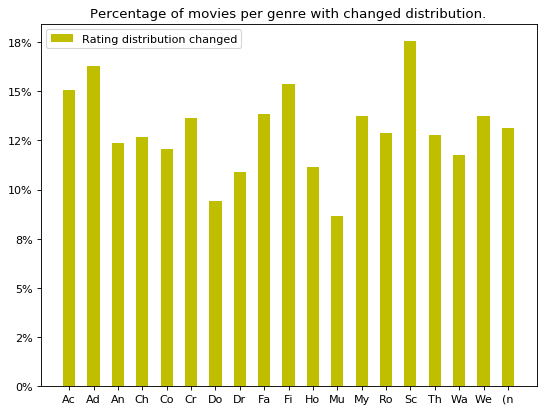

In [200]:
print(list(filter(lambda x : x != "IMAX", Genres)))
GenresWithoutIMAX = list(filter(lambda x : x != "IMAX", Genres))
percentage_gen = {i : good_gen[i] / all_gen[i] for i in GenresWithoutIMAX}
print(percentage_gen)

import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title("Percentage of movies per genre with changed distribution.")
plt.bar(list(map(lambda x: x[0:2],percentage_gen.keys())), 
        percentage_gen.values(), 
        width=0.5, 
        color='y').set_label("Rating distribution changed")
plt.legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.savefig("output/plots/Marcin_test_half_per_genre_percentage.pdf")

In [201]:
temp = pd.read_csv("output/ChiTestMovieLens.csv")

In [202]:
print(temp)

      movieId  pvalue (ordered sample)  pvalue (random sample1)  \
0           1             2.603160e-19                 0.336652   
1           2             6.410504e-06                 0.861988   
2           3             7.720390e-01                 0.983502   
3           4             1.123152e-01                 0.969107   
4           5             7.699567e-01                 0.922347   
...       ...                      ...                      ...   
8542   205383             3.623943e-01                 0.320411   
8543   205425             5.051991e-01                 0.441986   
8544   206499             6.571611e-01                 0.739227   
8545   206805             1.606419e-02                 0.246397   
8546   207830             8.326452e-02                 0.729034   

      pvalue (random sample2)  pvalue (random sample3)  
0                    0.586705                 0.849577  
1                    0.861988                 0.266531  
2                    0.3

In [203]:
print(len(temp.loc[temp['pvalue (ordered sample)'] < 0.05]))

1021


In [204]:
import re 

def filterFunction(year):
    if (year > 2014 and year < 2020):
        return True
    return False

def get_year_from_title(title):
    x = map(int,re.findall('\d+', title))
    x = list(filter(filterFunction,x))
    if (len(x) > 0):
        print(x)
        return(x[0])
    return 0

In [205]:
temp = temp.set_index('movieId').join(movies.set_index('movieId'))
print(temp)

         pvalue (ordered sample)  pvalue (random sample1)  \
movieId                                                     
1                   2.603160e-19                 0.336652   
2                   6.410504e-06                 0.861988   
3                   7.720390e-01                 0.983502   
4                   1.123152e-01                 0.969107   
5                   7.699567e-01                 0.922347   
...                          ...                      ...   
205383              3.623943e-01                 0.320411   
205425              5.051991e-01                 0.441986   
206499              6.571611e-01                 0.739227   
206805              1.606419e-02                 0.246397   
207830              8.326452e-02                 0.729034   

         pvalue (random sample2)  pvalue (random sample3)  \
movieId                                                     
1                       0.586705                 0.849577   
2                      

In [206]:
years = [2015, 2016, 2017, 2018, 2019]
good_years = {i : 0 for i in years}
all_years = {i : 0 for i in years}
for index, row in temp.iterrows():
    year = get_year_from_title(row['title'])
    if year > 2014 and year < 2020:
        all_years[year] = all_years[year] + 1
        if row['pvalue (ordered sample)'] < 0.05:
            good_years[year] = good_years[year] + 1

[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2016]
[2016]
[2015]
[2017]
[2017]
[2015]
[2015]
[2016]
[2017]
[2018]
[2018]
[2019]
[2017]
[2017]
[2016]
[2016]
[2016]
[2017]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]

In [207]:
print(all_years)
print(good_years)

{2015: 349, 2016: 316, 2017: 282, 2018: 230, 2019: 88}
{2015: 61, 2016: 53, 2017: 33, 2018: 25, 2019: 7}


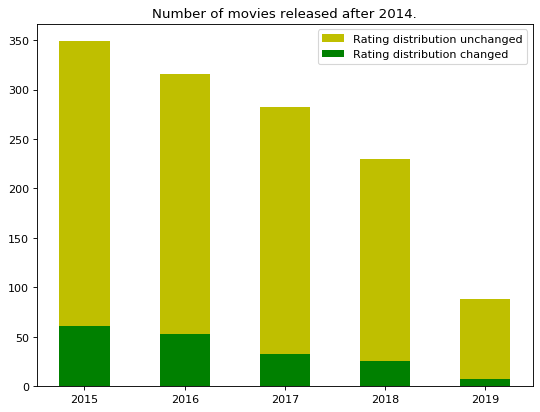

In [208]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Number of movies released after 2014.")
plt.bar(all_years.keys(), all_years.values(), width=0.5, color='y').set_label("Rating distribution unchanged")
plt.bar(good_years.keys(), good_years.values(), width=0.5, color='g').set_label("Rating distribution changed")
plt.legend()
plt.savefig("output/plots/Marcin_test_half_per_year.pdf")

In [209]:
percentage_years = {i : good_years[i] / all_years[i] for i in years}
print(percentage_years)

{2015: 0.17478510028653296, 2016: 0.16772151898734178, 2017: 0.11702127659574468, 2018: 0.10869565217391304, 2019: 0.07954545454545454}


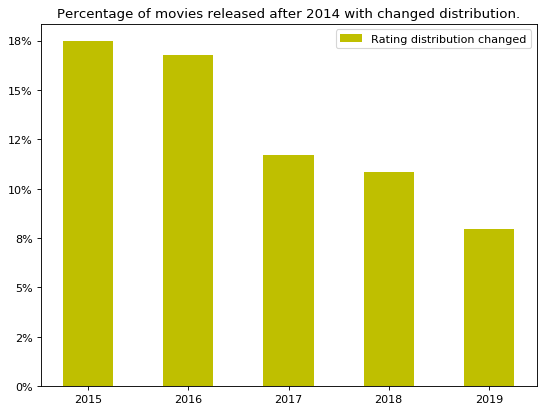

In [211]:
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title("Percentage of movies released after 2014 with changed distribution.")
plt.bar(percentage_years.keys(), 
        percentage_years.values(), 
        width=0.5, 
        color='y').set_label("Rating distribution changed")
plt.legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.savefig("output/plots/Marcin_test_half_per_year_percentage.pdf")